## Name: Daswadayalan Myladumparai Deenadayalan
## Student Id :23068427

# Clustering And Fitting 
### Penguin Species Sizes

In [291]:
#Importing packages
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

#### cleaning the csv file 

In [79]:
#reading the dataset
pingu_df=pd.read_csv(r'penguins_size.csv')
pingu_df = pingu_df.rename(columns={'culmen_length_mm': 'culmen_length_mm',
                                   'species':'species',
                                   'sex':'sex'})

#cleaning/removing the emptycell or null value or empty values in table
pingu_df.dropna(axis=0,inplace=True)
pingu_df.dropna(axis=1,inplace=True)
#removing unformated data
pingu_df = pingu_df[pingu_df['sex'] != '.']


#cleaning/removing the duplicates 
pingu_df.drop_duplicates(inplace=True)
#shows First 10 values
pingu_df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [29]:
#info about dataset
pingu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [31]:
#stastical depth description of penguin dataset
pingu_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


## Correlating all numerical value

In [33]:
#correlating all numeric values
corr_pingu_df=pingu_df.corr(method='pearson',numeric_only=True)
corr_pingu_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


## ploting a correlated values in heatmap
#### Ploting thr correlated values in heatmap using pearson method#### 
(xi-x)(yi-y)/sqrt((xi-x)^2(yi-y)^2)¶

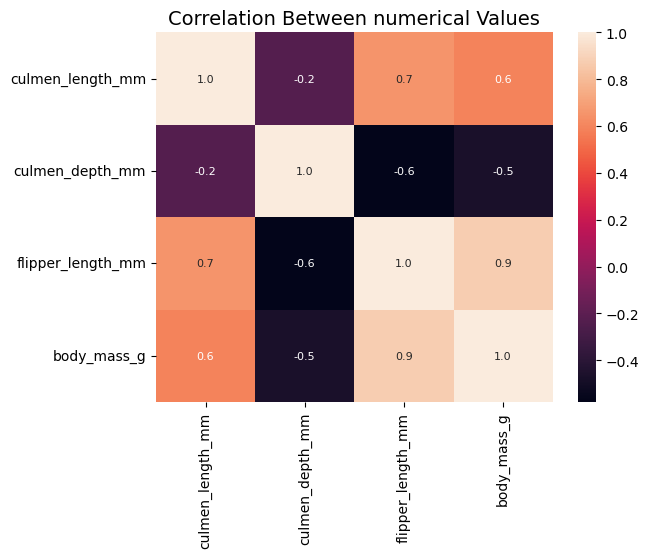

In [302]:
def heatmap_df(data):
    sns.heatmap(data=data,annot=True,fmt=".1f",annot_kws={'size': 8})
    plt.title('Correlation Between numerical Values',fontsize=14)
    return plt.show()
heatmap_df(corr_pingu_df)

# Describing stastical of distribution

In [37]:
#calling skew 
pingu_df.skew(numeric_only=True)

culmen_length_mm     0.044569
culmen_depth_mm     -0.144090
flipper_length_mm    0.352752
body_mass_g          0.465714
dtype: float64

In [39]:
#calling kurtosis
pingu_df.kurtosis(numeric_only=True)

culmen_length_mm    -0.877156
culmen_depth_mm     -0.893053
flipper_length_mm   -0.970973
body_mass_g         -0.739373
dtype: float64

In [97]:
#average body mass of penguins
pingu_df_grp= pingu_df.groupby(['sex'])['body_mass_g'].mean().reset_index(name='avg_body_mass_species')
pingu_df_grp


,sex,avg_body_mass_species
0,FEMALE,3862.272727
1,MALE,4545.684524




# Bar Graph


This bar graph shows the average body mass of the gender or sex of penguins
#### Purpose
The purpose of this graph is to compare the gender of penguins.




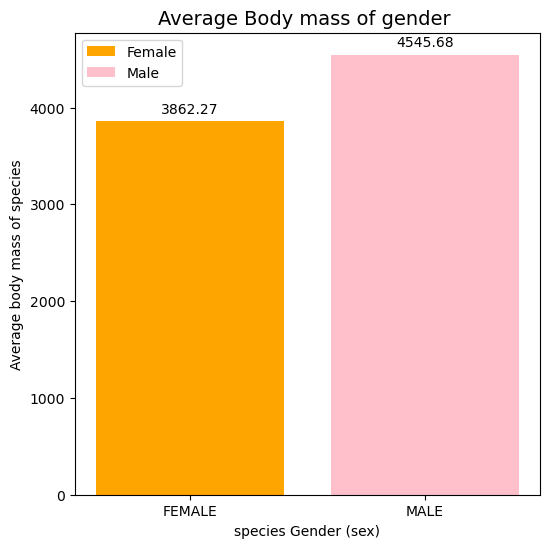

In [304]:
def bar_chart(data):
    """
    This bar graph shows the average body mass of the gender or sex of penguins
    """
    plt.figure(figsize=(6,6))
    plt.bar(x=data['sex'],height=data['avg_body_mass_species'],color=['orange','pink'],label=['Female','Male'])
    plt.xlabel('species Gender (sex)')
    plt.ylabel('Average body mass of species')
    plt.title("Average Body mass of gender ",fontsize=14)
    plt.legend()
    for i, value in enumerate(data['avg_body_mass_species']):
        plt.text(i, value + 50, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    return plt.show()
bar_chart(pingu_df_grp)



# scatter Graph
This scatter graph shows the ]relationship between depth and length of culmen
#### Purpose
The purpose of this graph is to relate the culmen of penguins.




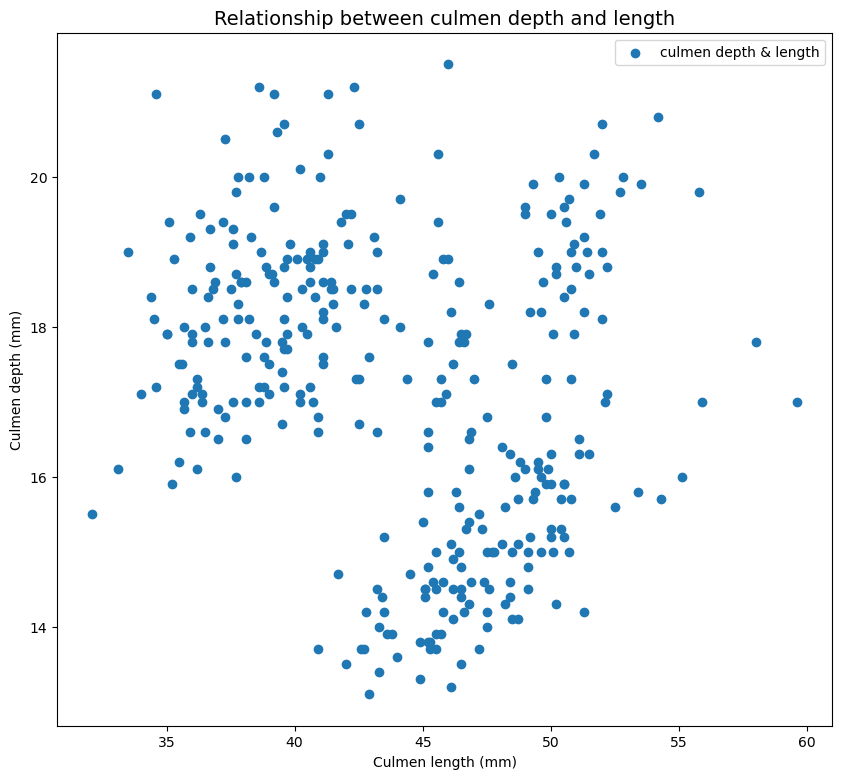

In [308]:
def scatter_plot(data):
    """This bar graph shows the average body mass of the gender or sex of penguins"""
    plt.figure(figsize=(10,9))
    plt.scatter(data['culmen_length_mm'],data['culmen_depth_mm'],label='culmen depth & length')
    plt.xlabel("Culmen length (mm)")
    plt.ylabel("Culmen depth (mm)")
    plt.title("Relationship between culmen depth and length",fontsize=14)
    plt.legend()
    return plt.show()
scatter_plot(pingu_df)

# cluster
### The K-Means algorithm is a method of data separation that divides the data into a pre-specified number of clusters by variance(inertia) minimizing. The sum of squared trajectories of each point to the centroid of its cluster. 

C:\Users\daswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


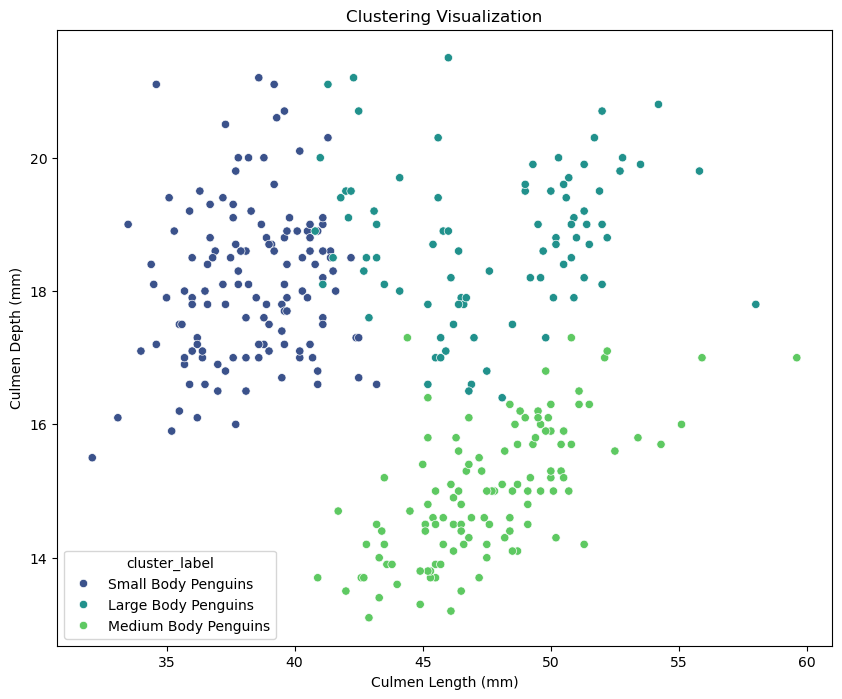

In [277]:
#clustering
def clustering(clust):
    pingu_df=pingu_df.dropna(subset=clust)
    """The K-Means algorithm is a method of data separation that divides the data into a pre-specified number of clusters by variance(inertia) minimizing. The sum of squared trajectories of each point to the centroid of its cluster."""
    #performing standard scalar
    scaler=StandardScaler()
    scaled_data=scaler.fit_transform(pingu_df[clust])
    #performing k means
    kmeans = KMeans(n_clusters=3, random_state=42)
    
    
    pingu_df['cluster'] = kmeans.fit_predict(scaled_data)
    cluster_label={0:'Small Penguin',1:'Medium Penguin',2:'Large Penguin'}
    pingu_df['cluster_label']=pingu_df['cluster'].map(cluster_labels)
    cluster_centers = kmeans.cluster_centers_
    #plotting clusters
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=pingu_df, x='culmen_length_mm', y='culmen_depth_mm', hue='cluster_label', palette='viridis')
    
    
    plt.title('Clustering Visualization')
    plt.xlabel('Culmen Length (mm)')
    plt.ylabel('Culmen Depth (mm)')
    return plt.show()
    
clust=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
clustering(clust)


In [241]:
#clustered labeled table
cluster_summary = pingu_df.groupby('cluster')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean()
cluster_summary
#creating a dict for labeling the clustered data
cluster_labels = {
    0: "Small Body Penguins",
    1: "Medium Body Penguins",
    2: "Large Body Penguins"
}
pingu_df['cluster_label'] = pingu_df['cluster'].map(cluster_labels)
pingu_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster,cluster_label
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,Small Body Penguins
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,Small Body Penguins
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,Small Body Penguins
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,Small Body Penguins
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,Small Body Penguins
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,1,Medium Body Penguins
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,1,Medium Body Penguins
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1,Medium Body Penguins
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1,Medium Body Penguins


## Linear Regression
#### The regressive line demonstrates data trend as the regression line indicates the trend of the data.Positive Slope: If the line goes up, this suggests that culmen depth as culmen length increases is likely to increase.Negative Slope: If the line points downwards, it points out a reverse relationship.Flat Line: Means that there is no significant relationship between the two variables.

In [348]:
def linear_regression():
    """ The regressive line demonstrates data trend as the regression line indicates the trend of the data.Positive Slope: If the line goes up, this suggests that culmen depth as culmen length increases is likely to increase.Negative Slope: If the line points downwards, it points out a reverse relationship.Flat Line: Means that there is no significant relationship between the two variables."""
    x = pingu_df[['culmen_length_mm']].values
    y = pingu_df[['culmen_depth_mm']].values
    #fitting linear rergression
    model = LinearRegression()
    model.fit(x,y)
    
    y_pred = model.predict(x)
    #plotting linear regression
    plt.figure(figsize=(8,6))
    plt.scatter(pingu_df['culmen_length_mm'], pingu_df['culmen_depth_mm'], color='blue', label='Data')
    plt.plot(pingu_df['culmen_length_mm'], y_pred, color='red', label='Fitted Line')
    plt.title('Linear Regression: culmen_length_mm and culmen_depth_mm')
    plt.xlabel('culmen length mm')
    plt.ylabel('culmen depth mm')
    return plt.show()

linear_regression()

IndentationError: expected an indented block after function definition on line 1 (1205168221.py, line 2)

### kmeans and elbow method

C:\Users\daswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\daswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\daswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\daswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

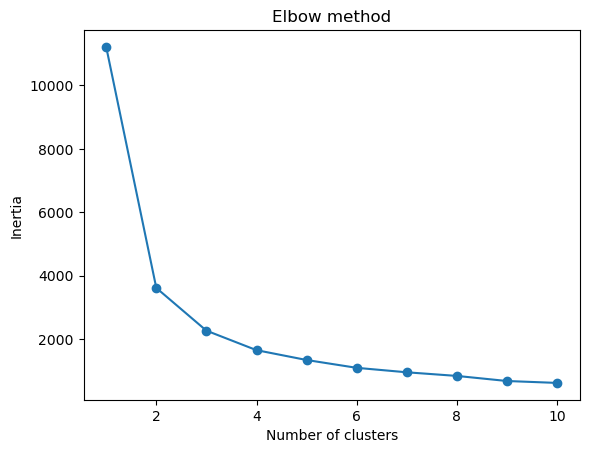

In [337]:

def elbow_plot(x):
    inert = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(x)
        inert.append(kmeans.inertia_)
    plt.plot(range(1,11), inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    return plt.show()
x=pingu_df[['culmen_length_mm','culmen_depth_mm']]
elbow_plot(x)

### Cluster and fitting prediction

In [335]:
def cluster_fitting_prediction():
    X = pingu_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
    y = pingu_df['species']
    # Spliting  the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # training  the model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    return f"Accuracy: {accuracy*100}%"
cluster_fitting_prediction()

'Accuracy: 100.0%'